<a href="https://colab.research.google.com/github/Angel-W10/Predicting_functional_neurons_project/blob/main/neuron_imaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the packages for the project
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
import pandas as pd
import calendar
import csv
from PIL import Image
import seaborn as sns

In [ ]:
!pip install -U tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 35.2 MB/s 


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

from sklearn.metrics import f1_score

In [ ]:
# %tensorflow_version 1.x

In [ ]:
!nvidia-smi

Tue Jun  7 08:01:56 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sort_file = pd.read_csv('control_disease_files.csv')

In [ ]:
sort_file.columns

Index(['Healthy or Disease (MPSIIIA)', 'Raw image folder name', 'Downloaded'], dtype='object')

In [ ]:
control, disease = (v for m,v in sort_file.groupby('Healthy or Disease (MPSIIIA)'))

In [ ]:
del sort_file

In [ ]:
control = control.drop('Downloaded', axis=1)
disease = disease.drop('Downloaded', axis=1)

In [ ]:
print(disease.shape)
print(control.shape)

(124, 2)
(106, 2)


In [ ]:
control_files = control.drop('Healthy or Disease (MPSIIIA)', axis=1)
disease_files = disease.drop('Healthy or Disease (MPSIIIA)', axis=1)

In [ ]:
control_files.head()

,Raw image folder name
0,20200616_U01_NE79_C5_CORTICAL_40X_SYNGFP_RHOD_DIC
1,20200616_U02_NE79_C5_CORTICAL_40X_SYNGFP_RHOD_DIC
2,20200616_U03_NE79_C5_CORTICAL_40X_SYNGFP_RHOD_DIC
3,20200616_U04_NE79_C5_CORTICAL_40X_SYNGFP_RHOD_DIC
4,20200617_U02_NE79_C6_CORTICAL_40X_SYNGFP_RHOD_DIC


In [ ]:
del control
del disease

In [ ]:
loc = '/content/drive/MyDrive/AIML/BardyLab Data - AIML collaboration/Morphology/Raw_Images/'

**An exapmle of how the resizing is working**

In [ ]:
im = Image.open('/content/drive/MyDrive/AIML/BardyLab Data - AIML collaboration/Morphology/Raw_Images/2020/June/20200616_U03_NE79_C5_CORTICAL_40X_SYNGFP_RHOD_DIC/RHODAMINE/img_channel000_position000_time000000004_z000.tif')


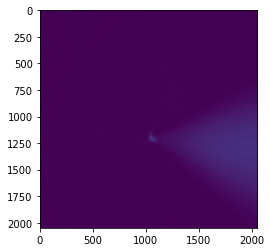

In [ ]:
plt.imshow(im)

In [ ]:
im.size
im = im.convert('I')

In [ ]:
im = im.resize((256, 256))
im.size

(256, 256)

In [ ]:
im = np.array(im)

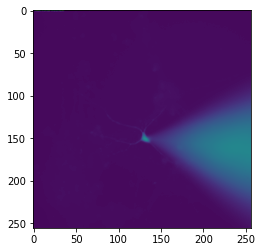

In [ ]:
plt.imshow(im)

**Back to the main code**

In [ ]:
def get_folder(name):
  my_str = name
  year = name[:4]
  month_num = name[4:6]
  month = calendar.month_name[int(month_num)]
  return year, month

In [ ]:
control_files = control_files.values.tolist()

In [ ]:
len(control_files)

106

In [ ]:
control_images = []


In [ ]:
count = 0
for im in control_files[:35]: 
  # gettign the year and month
  year,  month = get_folder(im[0])

  # setting the path to the folder to check
  temp_loc = loc + year + '/' + month + '/*'

  # loading the folder
  data = sorted(glob.glob(os.path.join(temp_loc)))

  # setting the path to the folder to check
  file_name = loc + year + '/' + month + '/' + str(im[0])

  # checking if the file exists
  if file_name in data:
    next_file = file_name + "/RHODAMINE/*.tif"


    # getting the images
    im_data = sorted(glob.glob(os.path.join(next_file)))

    # putting all the images in the control_images list
    for image in im_data:
        im = Image.open(image)
        im = im.convert('I')
        im = im.resize((256, 256), Image.ANTIALIAS)
        im = np.array(im)
        im = im/255

        control_images.append(im)
        count+=1
print("number of images:",count)

number of images: 380


In [ ]:
len(control_images)

380

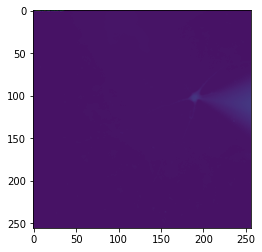

In [ ]:
# displaying a random sample
plt.imshow(control_images[np.random.choice(len(control_images))])
plt.show()

In [ ]:
disease_files = disease_files.values.tolist()

In [ ]:
disease_images = []

In [ ]:
count = 0
for im in disease_files[:35]: 
  # gettign the year and month
  year,  month = get_folder(im[0])

  # setting the path to the folder to check
  temp_loc = loc + year + '/' + month + '/*'

  # loading the folder
  data = sorted(glob.glob(os.path.join(temp_loc)))

  # setting the path to the folder to check
  file_name = loc + year + '/' + month + '/' + str(im[0])

  # checking if the file exists
  if file_name in data:
    next_file = file_name + "/RHODAMINE/*.tif"


    # getting the images
    im_data = sorted(glob.glob(os.path.join(next_file)))

    # putting all the images in the disease_images list
    for image in im_data:
        im = Image.open(image)
        im = im.convert('I')
        im = im.resize((256, 256), Image.ANTIALIAS)
        im = np.array(im)
        im = im/255

        disease_images.append(im)
        count+=1
print("number of images:", count)

number of images: 411


In [ ]:
print(len(disease_images))

411


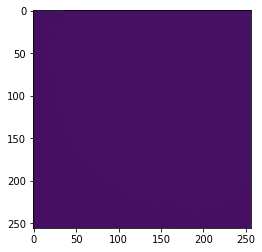

In [ ]:
# displaying a random sample
plt.imshow(disease_images[np.random.choice(len(disease_images))])
plt.show()

In [ ]:
# balancing out the arrays

c = len(control_images)
d = len(disease_images)
print(c, d)

if c<d:
  disease_images = disease_images[:c]
else:
  control_images = control_images[:d]

380 411


In [ ]:
print(len(disease_images), len(control_images))

380 380


In [ ]:
# y_control = np.zeros(len(control_images))
# y_disease = np.ones(len(disease_images))
# y = [*y_control, *y_disease]
# X = control_images + disease_images

# X = np.asarray(X)
# y = np.asarray(y)

# c = list(zip(X, y))
# np.random.shuffle(c)
# X, y = zip(*c)

In [ ]:
y_control = np.zeros(len(control_images))
y_disease = np.ones(len(disease_images))

In [ ]:
y = [*y_control, *y_disease]

In [ ]:
len(y)

760

In [ ]:
del y_control
del y_disease

In [ ]:
X = control_images + disease_images

In [ ]:
del control_images
del disease_images

In [ ]:
print(len(X), len(y))

760 760


In [ ]:
X = np.asarray(X)
y = np.asarray(y)

In [ ]:
c = list(zip(X, y))
np.random.shuffle(c)
X, y = zip(*c)

In [ ]:
n_split = 60

In [ ]:
# with open('data.csv', 'w') as data:
#   wr = csv.writer(data)
#   wr.writerows(X)

In [ ]:
X_train = X[n_split:]
X_test = X[:n_split]

In [ ]:
len(X_train)

700

In [ ]:
y_train = y[n_split:]
y_test = y[:n_split]

In [ ]:
len(y_train)

700

In [ ]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)


In [ ]:
X_train = X_train.reshape(-1, 256, 256)
X_test = X_test.reshape(-1, 256, 256)

In [ ]:
X_train.shape

(700, 256, 256)

In [ ]:
del X
del y

using a neural net

In [ ]:
# general settings for the baseline model

# a single hidden layer
hiddensize = [64 ,128, 256]
# the activation function for the hidden layers
actfn = 'relu'
# optimizer for the model
opt = 'adam'
# loss function for the model
loss = keras.losses.sparse_categorical_crossentropy
# metrics for the model
metrics = ['accuracy']
# number of epochs
epochs = 30
# batch size
batch_size = 32
# learning rate
lr = 0.01

In [ ]:
# defining a function to build the model
def model_base_factory(hiddensize, actfn, opt, loss, metrics):
    # defining the model
    model = keras.Sequential()
    # input layer
    model.add(keras.layers.Flatten(input_shape = [256 , 256])) 
    # hidden layers
    for i in (hiddensize):
        model.add(keras.layers.Dense(i, activation=actfn))
    # output layer
    model.add(keras.layers.Dense(2, activation='softmax'))
    # compiling the model
    model.compile(optimizer=opt, loss=loss, metrics=metrics)
    return model

In [ ]:
# creating our base model for the baseline comparison
base_model = model_base_factory(hiddensize, actfn, opt, loss, metrics)

# displaying the summary for the base model
base_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 65536)             0         
                                                                 
 dense_20 (Dense)            (None, 64)                4194368   
                                                                 
 dense_21 (Dense)            (None, 128)               8320      
                                                                 
 dense_22 (Dense)            (None, 256)               33024     
                                                                 
 dense_23 (Dense)            (None, 2)                 514       
                                                                 
Total params: 4,236,226
Trainable params: 4,236,226
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_base = base_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/30
22/22 [==============================] - 1s 14ms/step - loss: 8.2847 - accuracy: 0.5186 - val_loss: 9.8132 - val_accuracy: 0.5333
Epoch 2/30
22/22 [==============================] - 0s 8ms/step - loss: 4.6053 - accuracy: 0.5086 - val_loss: 2.7553 - val_accuracy: 0.5500
Epoch 3/30
22/22 [==============================] - 0s 8ms/step - loss: 1.9016 - accuracy: 0.5314 - val_loss: 1.1373 - val_accuracy: 0.5500
Epoch 4/30
22/22 [==============================] - 0s 8ms/step - loss: 1.0552 - accuracy: 0.5800 - val_loss: 1.2417 - val_accuracy: 0.6167
Epoch 5/30
22/22 [==============================] - 0s 8ms/step - loss: 1.0876 - accuracy: 0.5686 - val_loss: 1.4712 - val_accuracy: 0.4500
Epoch 6/30
22/22 [==============================] - 0s 8ms/step - loss: 1.0324 - accuracy: 0.5800 - val_loss: 0.9612 - val_accuracy: 0.6667
Epoch 7/30
22/22 [==============================] - 0s 8ms/step - loss: 0.7518 - accuracy: 0.6143 - val_loss: 0.7943 - val_accuracy: 0.6167
Epoch 8/30
22/22 [=

In [ ]:
# definig a function to plot the training and validation loss
def plot_history(history):
    # Plot the results (shifting validation curves appropriately)
    plt.figure(figsize=(8,5))
    n = len(history.history['accuracy'])
    plt.plot(np.arange(0,n),history.history['accuracy'], color='orange')
    plt.plot(np.arange(0,n),history.history['loss'],'b')
    plt.plot(np.arange(0,n)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
    plt.plot(np.arange(0,n)+0.5,history.history['val_loss'],'g')
    plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.gca().set_ylim(0, 1.2) # set the vertical range to [0-1] 
    plt.show() 

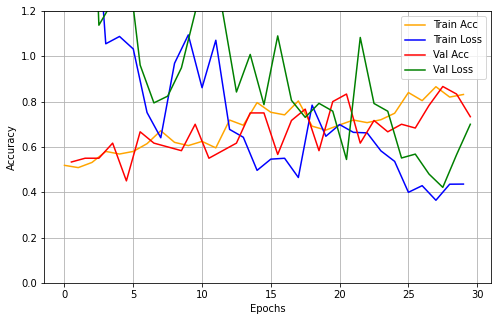

In [ ]:
plot_history(history_base)

In [ ]:
y_pred = base_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
print("The f1 score for the baseline model is: " + str(f1_score(y_test, y_pred)))

The f1 score for the baseline model is: 0.6666666666666666


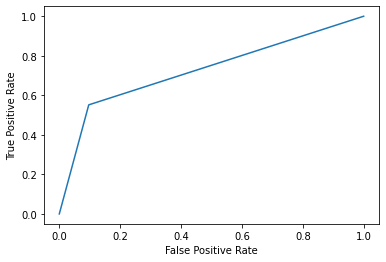

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)


#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
conf=metrics.confusion_matrix(y_test, y_pred)

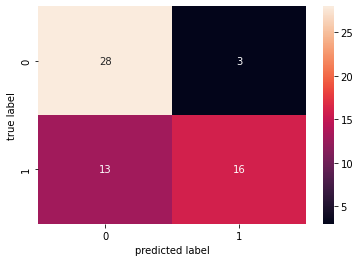

In [ ]:
sns.heatmap(conf, annot=True)
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.show()

we got an acuracy of 80% max, but the model overfit as we can see. so we will implement a early stopping procedure.

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=6,
                                                  restore_best_weights=True)

In [ ]:
# reshaping the images to use them in the CNN

In [ ]:
X_train = X_train.reshape(-1, 256, 256, 1)
X_test = X_test.reshape(-1, 256, 256, 1)

In [ ]:
print(X_train.shape, X_test.shape)

(700, 256, 256, 1) (60, 256, 256, 1)


In [ ]:
# we will also implement a CNN model

# creating a CNN model
def model_cnn_factory(hiddensize, actfn, opt, loss):
    model = keras.models.Sequential()
    # Conv 1
    model.add(keras.layers.Conv2D(filters = hiddensize[0], 
                                    kernel_size = (5, 5), activation = actfn, 
                                    input_shape = (256, 256, 1), strides = 1,
                                    padding = 'same'))
    # max pooling
    model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))
    # Adding the hidden layers
    for n in hiddensize[1:-1]:
        model.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1, padding='same', activation=actfn))
        model.add(keras.layers.MaxPooling2D(pool_size=2)) 
    # Adding the second conv layer
    model.add(keras.layers.Conv2D(filters=hiddensize[-1], kernel_size=3, strides=1, padding='same', activation=actfn))
    # Flattening
    model.add(keras.layers.Flatten())
    # output layer
    model.add(keras.layers.Dense(2, activation = 'softmax'))

    # compiling the model
    model.compile(loss=loss, optimizer=opt, metrics=["accuracy"])   
    return model

In [ ]:
test_model = model_cnn_factory(hiddensize, actfn, opt, loss)
test_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 256)       295168    
                                                                 
 flatten (Flatten)           (None, 1048576)           0

In [ ]:
def do_all(hiddensizes, actfn, optimizer, loss, batch_size, n_epochs, further_callbacks=[]):
    if further_callbacks != []:
        callbacks = further_callbacks
    else:
        callbacks = [early_stopping_cb]
    model = model_cnn_factory(hiddensizes, actfn, optimizer, loss)
    history = model.fit(X_train, y_train, epochs=n_epochs, callbacks = callbacks,
                        validation_data=(X_test, y_test), batch_size = batch_size)
    max_val_acc = np.max(history.history['val_accuracy'])
    return (max_val_acc, history, model)

Without the callback

In [ ]:
cnn_model = model_cnn_factory(hiddensize, actfn, opt, loss)
history = cnn_model.fit(X_train, y_train, epochs=30,
                        validation_data=(X_test, y_test), batch_size = batch_size)

Epoch 1/30
22/22 [==============================] - 4s 147ms/step - loss: 3.9701 - accuracy: 0.5129 - val_loss: 0.6655 - val_accuracy: 0.5333
Epoch 2/30
22/22 [==============================] - 3s 140ms/step - loss: 0.5542 - accuracy: 0.7129 - val_loss: 0.3903 - val_accuracy: 0.8667
Epoch 3/30
22/22 [==============================] - 3s 140ms/step - loss: 0.3445 - accuracy: 0.8471 - val_loss: 0.3881 - val_accuracy: 0.8333
Epoch 4/30
22/22 [==============================] - 3s 142ms/step - loss: 0.2616 - accuracy: 0.8957 - val_loss: 0.3839 - val_accuracy: 0.8167
Epoch 5/30
22/22 [==============================] - 3s 141ms/step - loss: 0.2200 - accuracy: 0.9186 - val_loss: 0.3387 - val_accuracy: 0.8833
Epoch 6/30
22/22 [==============================] - 3s 142ms/step - loss: 0.1943 - accuracy: 0.9100 - val_loss: 0.4471 - val_accuracy: 0.8167
Epoch 7/30
22/22 [==============================] - 3s 142ms/step - loss: 0.1627 - accuracy: 0.9357 - val_loss: 0.5329 - val_accuracy: 0.8667
Epoch 

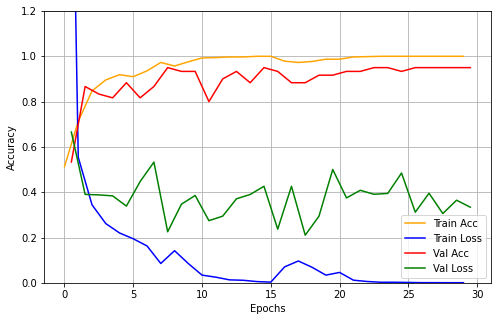

In [ ]:
plot_history(history)

In [ ]:
y_pred = cnn_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
from sklearn import metrics

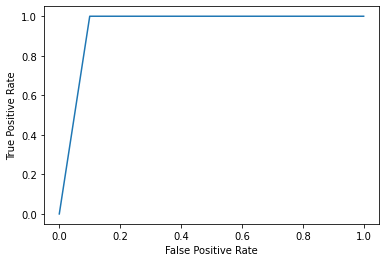

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)


#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

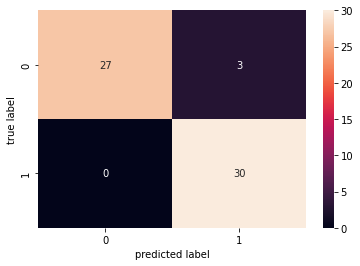

In [ ]:
conf=metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True)
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.show()

In [ ]:
print("The f1 score for the base CNN model is: " + str(f1_score(y_test, y_pred)))

The f1 score for the base CNN model is: 0.9523809523809523


#

#
With the callback
#

#

In [ ]:
epochs = 30

In [ ]:
val_accuracy_es_cnn, history_es_cnn, model_es_cnn = do_all(hiddensize, 
                                                           actfn, 
                                                           opt, 
                                                           loss,
                                                           batch_size, 
                                                           epochs,
                                                           [early_stopping_cb])

Epoch 1/30
22/22 [==============================] - 4s 149ms/step - loss: 2.1528 - accuracy: 0.5486 - val_loss: 0.6328 - val_accuracy: 0.6667
Epoch 2/30
22/22 [==============================] - 3s 139ms/step - loss: 0.5020 - accuracy: 0.7429 - val_loss: 0.4378 - val_accuracy: 0.8167
Epoch 3/30
22/22 [==============================] - 3s 139ms/step - loss: 0.3040 - accuracy: 0.8686 - val_loss: 0.3271 - val_accuracy: 0.8833
Epoch 4/30
22/22 [==============================] - 3s 138ms/step - loss: 0.2565 - accuracy: 0.8943 - val_loss: 0.4520 - val_accuracy: 0.8500
Epoch 5/30
22/22 [==============================] - 3s 140ms/step - loss: 0.1891 - accuracy: 0.9214 - val_loss: 0.3555 - val_accuracy: 0.8333
Epoch 6/30
22/22 [==============================] - 3s 139ms/step - loss: 0.1768 - accuracy: 0.9371 - val_loss: 0.2745 - val_accuracy: 0.9167
Epoch 7/30
22/22 [==============================] - 3s 140ms/step - loss: 0.1048 - accuracy: 0.9586 - val_loss: 0.4132 - val_accuracy: 0.7833
Epoch 

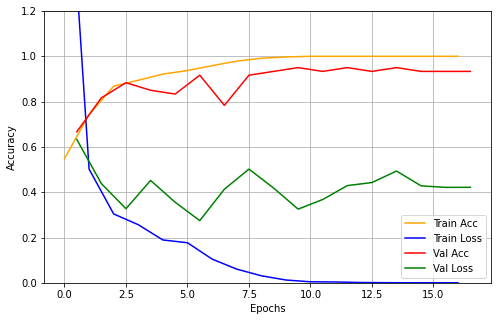

In [ ]:
plot_history(history_es_cnn)

In [ ]:
y_pred = cnn_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
print("The f1 score for the base CNN model is: " + str(f1_score(y_test, y_pred)))

The f1 score for the base CNN model is: 0.9523809523809523


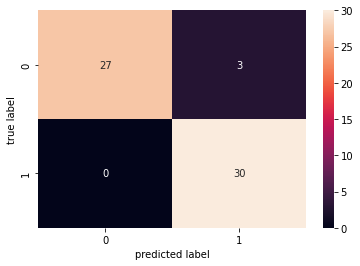

In [ ]:
conf=metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True)
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.show()

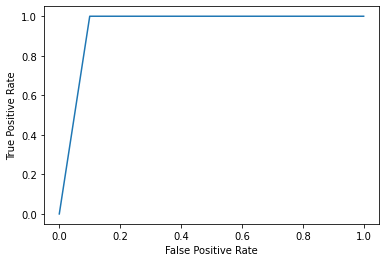

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)


#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
import os.path

In [ ]:
if os.path.isfile('95_neuron_model_cnn.h5') is False:
  model_es_cnn.save('95_neuron_model_cnn.h5')

The model is overfitting, so we add l2 regulzation to see if that helps

In [ ]:
batch_size = 32

added l2 regularization

In [ ]:
import tensorflow as tf
from tensorflow.keras import regularizers

In [ ]:
# creating a CNN model
def model_cnn_l2_factory(hiddensize, actfn, opt, loss):
    model = keras.models.Sequential()
    # Conv 1
    model.add(keras.layers.Conv2D(filters = hiddensize[0], 
                                    kernel_size = (5, 5), activation = actfn, 
                                    input_shape = (256, 256, 1), strides = 1,
                                    padding = 'same',
                                    kernel_regularizer=regularizers.L2(0.01)))
    # max pooling
    model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))
    # Adding the hidden layers
    for n in hiddensize[1:-1]:
        model.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1, padding='same', activation=actfn, kernel_regularizer=regularizers.L2(0.01)))
        model.add(keras.layers.MaxPooling2D(pool_size=2)) 
    # Adding the second conv layer
    model.add(keras.layers.Conv2D(filters=hiddensize[-1], kernel_size=3, strides=1, padding='same', activation=actfn))
    # Flattening
    model.add(keras.layers.Flatten())
    # output layer
    model.add(keras.layers.Dense(2, activation = 'softmax'))

    # compiling the model
    model.compile(loss=loss, optimizer=opt, metrics=["accuracy"])  
    # print(model.summary())  
    return model

In [ ]:
def do_all(hiddensizes, actfn, optimizer, loss, batch_size, n_epochs, further_callbacks=[]):
    if further_callbacks != []:
        callbacks = further_callbacks
    else:
        callbacks = [early_stopping_cb]
    model = model_cnn_l2_factory(hiddensizes, actfn, optimizer, loss)
    history = model.fit(X_train, y_train, epochs=n_epochs, callbacks = callbacks,
                        validation_data=(X_test, y_test),
                        batch_size=batch_size)
    max_val_acc = np.max(history.history['val_accuracy'])
    return (max_val_acc, history, model)

In [ ]:
val_accuracy_es_cnn_l2, history_es_cnn_l2, model_es_cnn_l2 = do_all(hiddensize, 
                                                           actfn, 
                                                           opt, 
                                                           loss,
                                                           32, 
                                                           30, 
                                                           [early_stopping_cb])

Epoch 1/30
22/22 [==============================] - 4s 149ms/step - loss: 3.6718 - accuracy: 0.5343 - val_loss: 1.2908 - val_accuracy: 0.6333
Epoch 2/30
22/22 [==============================] - 3s 140ms/step - loss: 1.2154 - accuracy: 0.6257 - val_loss: 1.0791 - val_accuracy: 0.6833
Epoch 3/30
22/22 [==============================] - 3s 138ms/step - loss: 1.0439 - accuracy: 0.7500 - val_loss: 0.9098 - val_accuracy: 0.8000
Epoch 4/30
22/22 [==============================] - 3s 138ms/step - loss: 0.8340 - accuracy: 0.8071 - val_loss: 1.1710 - val_accuracy: 0.7667
Epoch 5/30
22/22 [==============================] - 3s 138ms/step - loss: 0.6916 - accuracy: 0.8786 - val_loss: 0.8162 - val_accuracy: 0.8000
Epoch 6/30
22/22 [==============================] - 3s 138ms/step - loss: 0.6192 - accuracy: 0.9043 - val_loss: 0.7304 - val_accuracy: 0.8500
Epoch 7/30
22/22 [==============================] - 3s 138ms/step - loss: 0.5577 - accuracy: 0.9143 - val_loss: 0.7698 - val_accuracy: 0.8500
Epoch 

In [ ]:
model_es_cnn_l2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 256)       295168    
                                                                 
 flatten (Flatten)           (None, 1048576)           0

In [ ]:
# if os.path.isfile('neuron_model_cnn_l2.h5') is False:
#   model_es_cnn.save('neuron_model_cnn_l2.h5')

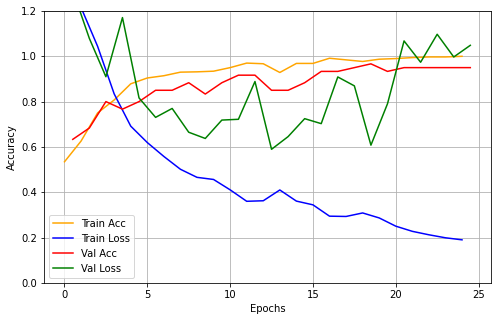

In [ ]:
plot_history(history_es_cnn_l2)

ROC CURVE for the CNN with L2 regularization

In [ ]:
y_pred = model_es_cnn_l2.predict(X_test)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

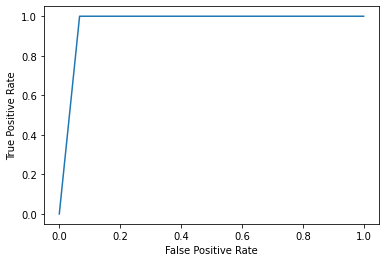

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)


#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

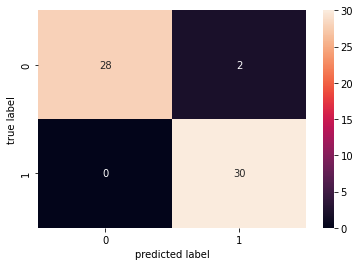

In [ ]:
conf=metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True)
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.show()

In [ ]:
print("The f1 score for the CNN with l2 and early callback model is: " + str(f1_score(y_test, y_pred)))

The f1 score for the CNN with l2 and early callback model is: 0.967741935483871


##########################################################

##########################################################

Transformers from Google's paper : https://arxiv.org/abs/2010.11929

In [ ]:
X_train = X_train.reshape(-1, 256, 256)
X_test = X_test.reshape(-1, 256, 256)

In [ ]:
input_shape = (256, 256)

In [ ]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 100
image_size = 72  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(X_train)


In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x


In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches


In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded


In [ ]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(2)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [ ]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    print(X_train.shape)

    history = model.fit(
        x=X_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(X_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history

vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

ValueError: ignored